In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [3]:
# Load data files
path = "group3_resources/SpotifyFeatures.csv"


# Read the data 
spotify_df = pd.read_csv(path)

#Visualizing data
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [32]:
#Dropping some columns that are not relevant for our objective
spotify_df1=spotify_df.drop(columns=['acousticness','duration_ms','instrumentalness',
                                     'liveness','speechiness','time_signature'])
spotify_df1

,genre,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.389,0.910,C#,-1.828,Major,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.590,0.737,F#,-5.559,Minor,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.663,0.131,C,-13.879,Minor,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.240,0.326,C#,-12.178,Major,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.331,0.225,F,-21.150,Major,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.687,0.714,D,-10.626,Major,115.542,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.785,0.683,E,-6.944,Minor,113.830,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.517,0.419,D,-8.282,Major,84.135,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.745,0.704,A,-7.137,Major,100.031,0.489


In [5]:
count_track_name=spotify_df1["track_name"].value_counts()
count_track_name

Home                                                          100
You                                                            71
Intro                                                          69
Stay                                                           63
Wake Up                                                        59
                                                             ... 
My Farm Is Saved/Little Patch Of Heaven - Finale (Score)        1
American (feat. The Cast of RuPaul's Drag Race, Season 10)      1
Celebrities                                                     1
Larry the Cable Guy Intro                                       1
Bet No One Ever Hurt This Bad                                   1
Name: track_name, Length: 148615, dtype: int64

In [6]:
#counting tracks
count_tracks=spotify_df1["track_id"].value_counts()
count_tracks


0wY9rA9fJkuESyYm9uzVK5    8
6sVQNUvcVFTXvlk3ec0ngd    8
3uSSjnDMmoyERaAK9KvpJR    8
3R73Y7X53MIQZWnKloWq5i    8
0UE0RhnRaEYsiYgXpyLoZc    8
                         ..
44msiAAxSelqKr7q8toVVB    1
6dmUz77mDLsUhkoYu9c4rO    1
59GJkQNSKKA7km23fYj7dW    1
4RJ4VGjtYUaJGn9aJIR27b    1
1yC43RpwqyJLPMwHmrdOFF    1
Name: track_id, Length: 176774, dtype: int64

In [7]:
#counting artist
count_artist=spotify_df1["artist_name"].value_counts()
count_artist

Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
                          ... 
Mattias Bärjed               1
Intocable                    1
Blindside                    1
the Graveltones              1
The Submarines               1
Name: artist_name, Length: 14564, dtype: int64

In [8]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df1.set_index('track_id')
track=data_tracks.loc['6sVQNUvcVFTXvlk3ec0ngd']
track

,genre,artist_name,track_name,popularity,danceability,energy,loudness,tempo,valence
track_id,,,,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,Alternative,Cocteau Twins,Cherry-coloured Funk,57,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Dance,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Electronic,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Folk,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Children’s Music,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Indie,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Rock,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,World,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365


In [9]:
#Grouping by track id and take the max for each track popularity
genres_group=pd.DataFrame(spotify_df.groupby(['track_id'])['popularity'].max())
genres_group=genres_group.reset_index()
genres_group

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,13
1,000CzNKC8PEt1yC3L8dqwV,5
2,000DfZJww8KiixTKuk9usJ,30
3,000EWWBkYaREzsBplYjUag,39
4,000xQL6tZNLJzIrtIgxqSl,70
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,38
176770,7zzFNNxVD0h0ctAT08H0pa,40
176771,7zzTeItz93lYI52hlcipm5,28
176772,7zzZmpw8L66ZPjH1M6qmOs,67


In [33]:
#Dropping duplicates, keeping just one of the duplicates, removing 2 columns
drop_duplicates=spotify_df1.drop_duplicates(subset=['track_id']).drop(columns=['popularity'])
drop_duplicates

,genre,artist_name,track_name,track_id,danceability,energy,key,loudness,mode,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,C#,-1.828,Major,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,F#,-5.559,Minor,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,C,-13.879,Minor,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,C#,-12.178,Major,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,F,-21.150,Major,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,A#,-4.345,Minor,99.991,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,D,-9.014,Major,175.666,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,A#,-13.092,Minor,80.023,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,E,-6.944,Minor,113.830,0.969


In [34]:
#merging the popularity mean to the free duplicate data and getting rid of comedy genre
clean_df=pd.merge(drop_duplicates,genres_group,how='left',on='track_id')
clean_df=clean_df[clean_df.genre !='Comedy']
clean_df

,genre,artist_name,track_name,track_id,danceability,energy,key,loudness,mode,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,C#,-1.828,Major,166.969,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,F#,-5.559,Minor,174.003,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,C,-13.879,Minor,99.488,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,C#,-12.178,Major,171.758,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,F,-21.150,Major,140.576,0.390,4
...,...,...,...,...,...,...,...,...,...,...,...,...
176769,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,A#,-4.345,Minor,99.991,0.770,39
176770,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,D,-9.014,Major,175.666,0.482,43
176771,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,A#,-13.092,Minor,80.023,0.497,32
176772,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,E,-6.944,Minor,113.830,0.969,38


In [43]:
bottom_track=clean_df.nsmallest(5,'popularity')
bottom_track

,genre,artist_name,track_name,track_id,danceability,energy,key,loudness,mode,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.9100,C#,-1.828,Major,166.969,0.8140,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.3260,C#,-12.178,Major,171.758,0.2270,0
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0.578,0.0948,C#,-14.970,Major,87.479,0.3580,0
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0.734,0.4810,C,-7.725,Major,125.080,0.7650,0
10,Movie,Leopold Stokowski,Symphony No.4 In E Minor Op.98 : IV. Allegro E...,0XKgegoxLcIihK3Klpfo3N,0.191,0.1450,E,-17.239,Minor,85.225,0.0849,0


In [44]:
top_track=clean_df.nlargest(5,'popularity')
top_track

,genre,artist_name,track_name,track_id,danceability,energy,key,loudness,mode,tempo,valence,popularity
8977,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,0.725,0.321,C#,-10.744,Minor,70.142,0.319,100
8976,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,0.726,0.554,F,-5.290,Minor,169.999,0.335,99
78445,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,0.833,0.539,B,-7.399,Minor,99.947,0.385,99
61337,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,0.737,0.860,G#,-2.652,Minor,93.989,0.656,98
8978,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,F#,-7.050,Major,136.041,0.533,97


In [35]:
correlation_df=clean_df.corr()
correlation_df

,danceability,energy,loudness,tempo,valence,popularity
danceability,1.000000,0.380948,0.473695,0.052006,0.593916,0.233076
energy,0.380948,1.000000,0.841702,0.272521,0.483763,0.267489
loudness,0.473695,0.841702,1.000000,0.249271,0.437901,0.322259
tempo,0.052006,0.272521,0.249271,1.000000,0.161243,0.055758
valence,0.593916,0.483763,0.437901,0.161243,1.000000,0.045729
popularity,0.233076,0.267489,0.322259,0.055758,0.045729,1.000000


In [13]:
#Group by popularity  to sort out more
genres_popularity=pd.DataFrame(clean_df.groupby(['genre'])['popularity'].count())
genres_popularity_count=genres_popularity.rename(columns={'popularity':'Count of Tracks',
                                                          'genre':"Genre"})
genres_popularity_count=genres_popularity_count.sort_values("Count of Tracks", ascending=False)
genres_popularity_count

,Count of Tracks
genre,
Electronic,9149
Alternative,9095
Anime,8935
Classical,8711
Reggae,8687
Reggaeton,8549
Blues,8496
Soundtrack,8480
Opera,8280


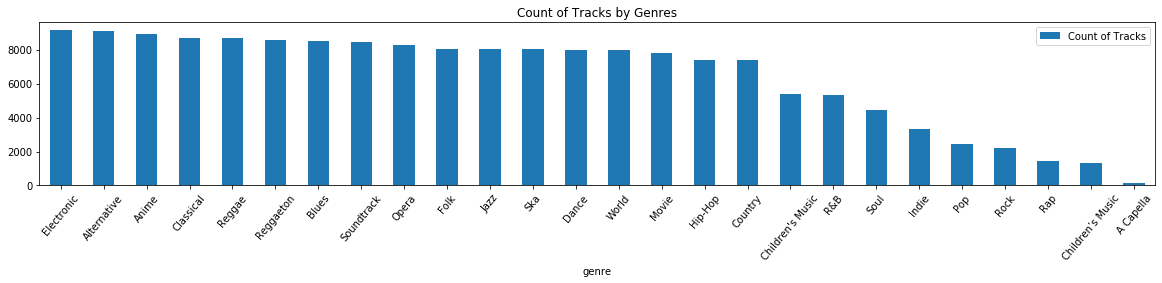

<Figure size 432x288 with 0 Axes>

In [14]:
# Use DataFrame.plot() in order to create a bar chart of the data
genres_popularity_count.plot(kind="bar",rot=50, figsize=(20,3))

# Set a title for the chart
plt.title("Count of Tracks by Genres")
plt.savefig("Images/Bar Chart 1.png")
plt.show()
plt.tight_layout()

In [41]:
#Calculating and listing average for music parameters for each genre
genre_df = clean_df.groupby(['genre'])
max_score = pd.DataFrame(round(genre_df.max(),2))   
max_score1 = max_score.loc[:,['popularity','danceability','energy','tempo','loudness','valence']]



max_score1.rename(columns={'genre':'Genre',
                       'popularity':'Popularity',
                      'danceability': 'Danceability',
                      'energy':'Energy',
                       'tempo':'Tempo',
                       'loudness':'Loudness',
                       'valence':'Valence'
                     }, inplace=True)
max_score1=max_score1.reset_index()
max_score1

,genre,Popularity,Danceability,Energy,Tempo,Loudness,Valence
0,A Capella,44,0.78,0.82,181.71,-3.56,0.97
1,Alternative,86,0.97,1.00,213.79,1.34,0.98
2,Anime,76,0.92,1.00,220.28,1.89,1.00
3,Blues,82,0.98,1.00,242.90,3.74,0.98
4,Children's Music,51,0.99,1.00,220.12,0.95,1.00
5,Children’s Music,87,0.90,0.99,208.53,-0.87,0.97
6,Classical,70,0.83,1.00,212.92,-1.79,0.98
7,Country,82,0.95,0.99,217.54,-0.52,0.98
8,Dance,100,0.97,1.00,218.08,0.13,0.99
9,Electronic,85,0.99,1.00,220.17,1.58,0.99


In [81]:
#Sorting top 5 popular genres based on popularity
top_5 = max_score1.sort_values("Popularity", ascending=False)
top_5=top_5.set_index('genre')
top_5.head(5)

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
genre,,,,,,
Dance,100,0.97,1.00,218.08,0.13,0.99
Rap,99,0.97,0.98,216.12,-0.82,0.96
Hip-Hop,98,0.99,1.00,214.13,1.01,0.98
Pop,97,0.96,0.99,208.95,0.63,0.98
Reggaeton,96,0.97,0.99,234.92,0.07,0.98


In [82]:
#Sorting bottom 5 popular genres based on popularity
worst_5 = max_score1.sort_values("Popularity", ascending=True)
worst_5=worst_5.set_index('genre')
worst_5.head(5)

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
genre,,,,,,
A Capella,44,0.78,0.82,181.71,-3.56,0.97
Children's Music,51,0.99,1.00,220.12,0.95,1.00
Opera,63,0.69,0.70,236.74,-3.58,0.97
Ska,66,0.98,1.00,221.58,1.10,0.99
Classical,70,0.83,1.00,212.92,-1.79,0.98


In [21]:
popularity_bins=max_score1.copy()
#Creating popularity bins

size_bins = [0, 40, 60, 80,90,100]

# Create labels for these bins
size_labels = ["Not Popular (< 40)", "A Little Popular (40-60)", "Likable But Not Popular (60-80)","Popular (80-90)","Most Popular (90-100)"]
popularity_bins["Popularity Size"]=pd.cut(max_score1["Popularity"], size_bins, labels=size_labels)
popularity_bins

,genre,Popularity,Danceability,Energy,Tempo,Loudness,Valence,Popularity Size
0,A Capella,44,0.78,0.82,181.71,-3.56,0.97,A Little Popular (40-60)
1,Alternative,86,0.97,1.00,213.79,1.34,0.98,Popular (80-90)
2,Anime,76,0.92,1.00,220.28,1.89,1.00,Likable But Not Popular (60-80)
3,Blues,82,0.98,1.00,242.90,3.74,0.98,Popular (80-90)
4,Children's Music,51,0.99,1.00,220.12,0.95,1.00,A Little Popular (40-60)
5,Children’s Music,87,0.90,0.99,208.53,-0.87,0.97,Popular (80-90)
6,Classical,70,0.83,1.00,212.92,-1.79,0.98,Likable But Not Popular (60-80)
7,Country,82,0.95,0.99,217.54,-0.52,0.98,Popular (80-90)
8,Dance,100,0.97,1.00,218.08,0.13,0.99,Most Popular (90-100)
9,Electronic,85,0.99,1.00,220.17,1.58,0.99,Popular (80-90)


In [22]:
#Visualizing data in bins
summary_by_popularity_size=popularity_bins.groupby(by="Popularity Size").mean()

summary_by_popularity_size

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
Popularity Size,,,,,,
Not Popular (< 40),NaN,NaN,NaN,NaN,NaN,NaN
A Little Popular (40-60),47.500000,0.885000,0.910000,200.915000,-1.305,0.985000
Likable But Not Popular (60-80),73.333333,0.896667,0.957778,221.521111,-1.060,0.981111
Popular (80-90),84.700000,0.948000,0.996000,221.640000,0.057,0.983000
Most Popular (90-100),98.000000,0.972000,0.992000,218.440000,0.204,0.978000


In [23]:
# Visualize a data with popularity above 90 points
top_songs=clean_df.loc[clean_df['popularity'] >90]
top_songs

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
8976,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,0.726,0.554,-5.290,169.999,0.335,99
8977,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,0.725,0.321,-10.744,70.142,0.319,100
8978,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,-7.050,136.041,0.533,97
8979,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,0.647,0.309,-7.948,87.045,0.195,92
8980,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,0.747,0.458,-6.891,75.029,0.470,91
8981,Dance,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,0.724,0.647,-5.642,106.960,0.435,95
8982,Dance,Ariana Grande,bloodline,2hloaUoRonYssMuqLCBLTX,0.758,0.665,-5.188,151.976,0.643,91
8983,Dance,Ariana Grande,bad idea,5Il6Oe7lr5XM7A0cWbVQtr,0.847,0.579,-5.314,137.998,0.569,91
8984,Dance,benny blanco,Eastside (with Halsey & Khalid),0d2iYfpKoM0QCKvcLCkBao,0.560,0.680,-7.648,89.391,0.319,91
8986,Dance,Lauv,i'm so tired...,7COXchtUOMd6uIT6HvmRaI,0.599,0.733,-7.058,102.211,0.534,94


In [80]:
top_songs.describe()

,danceability,energy,loudness,tempo,valence,popularity
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.734825,0.630439,-5.789070,116.644737,0.491561,93.596491
std,0.112266,0.150172,1.999489,29.220895,0.192203,2.541510
min,0.501000,0.309000,-12.890000,70.142000,0.137000,91.000000
25%,0.674000,0.539000,-6.711000,95.799000,0.347000,91.000000
50%,0.747000,0.631000,-5.574000,106.960000,0.483000,93.000000
75%,0.826000,0.758000,-4.673000,137.947000,0.643000,95.000000
max,0.921000,0.904000,-2.652000,202.006000,0.933000,100.000000


In [24]:
# Visualize a data with popularity less than 20 points
least_songs=clean_df.loc[clean_df['popularity'] < 20]
least_songs

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,-5.559,174.003,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,-13.879,99.488,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,-12.178,171.758,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,-21.150,140.576,0.390,4
...,...,...,...,...,...,...,...,...,...,...
174736,Soul,Dionne Warwick,With All My Heart,0ZAZal4DU8R26RZTSPxqA2,0.541,0.414,-9.114,127.949,0.155,0
175010,Soul,Candi Staton,Nights On Broadway,4eNNZ0JPhSTofhZVGJzy6h,0.686,0.561,-11.607,102.090,0.933,0
175918,Soul,Betty Wright,All Your Kissin' Sho' Don't Make True Lovin',3uu0paJlCBa5TXsWfSjZEQ,0.578,0.659,-11.202,110.802,0.907,0
175983,Soul,Carla Thomas,Will You Love Me Tomorrow,2VGtb4ecniIFgNDwN4l5sk,0.731,0.388,-10.977,109.404,0.839,0


In [25]:
# Get minimum value of a single column popular
least_popularity = least_songs.sort_values('popularity', ascending=True)
least_popularity

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.8140,0
68958,Children's Music,Children Songs Company,Litte One,074TetgC81CEE99JKG0ICF,0.606,0.716,-10.505,119.987,0.8500,0
68959,Children's Music,Radha,Rererangi - Aeroplane,09FLHP0HJPqU9XTCBMjOLp,0.852,0.227,-11.118,120.807,0.4670,0
68960,Children's Music,Radha,Twinkle Twinkle Little Star,0AvG3FsPLy4eNyzfR9H5jf,0.847,0.189,-12.672,108.621,0.5140,0
68961,Children's Music,Pacific Boychoir,World Words: I. Nasha Hozho,0P41zDUlBT2oLPhrEB4qBl,0.225,0.171,-18.144,58.284,0.0294,0
...,...,...,...,...,...,...,...,...,...,...
144304,Ska,Five Iron Frenzy,Juggernaut,2OQrmUNExmFxWVFq5vbEoM,0.661,0.923,-1.862,107.039,0.6540,19
144313,Ska,Survay Says!,I Aim to Misbehave,2PgmGRuqRrTcTIlbsMIZag,0.499,0.930,-3.550,99.778,0.2780,19
144315,Ska,The Urge,What Is This,7n4oAVGCp5K8R3rj2mDZhS,0.534,0.935,-5.844,94.728,0.7970,19
144194,Ska,Desmond Dekker,(Where Did It Go) The Song We Used to Sing,1rWPo96fbtUQhYewql4GK7,0.650,0.734,-8.087,147.922,0.9410,19


In [79]:
least_popularity.describe()

,danceability,energy,loudness,tempo,valence,popularity
count,25530.000000,25530.000000,25530.000000,25530.000000,25530.000000,25530.000000
mean,0.477816,0.384352,-13.875978,114.753946,0.435057,8.075362
std,0.209627,0.288883,7.182709,32.278421,0.300221,6.700492
min,0.059200,0.000216,-52.457000,32.244000,0.000000,0.000000
25%,0.307000,0.142000,-18.634750,88.118250,0.152000,1.000000
50%,0.469000,0.305000,-13.128000,111.582500,0.399000,8.000000
75%,0.641000,0.598000,-8.178500,135.002250,0.696000,14.000000
max,0.989000,0.999000,1.100000,236.735000,1.000000,19.000000


The correlation between popularity and danceability is 0.23


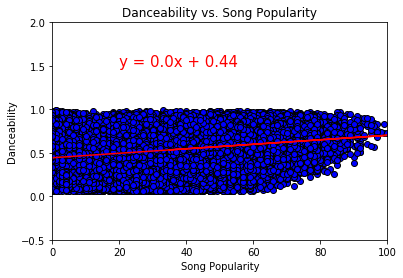

In [27]:
# Generate a scatter plot of popularity versus danceability
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter=clean_df["danceability"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Danceability")
plt.title("Danceability vs. Song Popularity")
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between popularity and danceability is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
plt.savefig("Images/Scatterplot of Dance vs Popul.png")

The correlation between popularity and tempo is 0.27


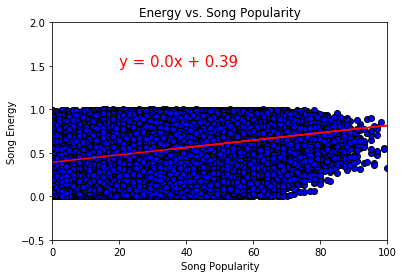

In [28]:
# Generate a scatter plot of popularity versus energy
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter1=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter1=clean_df["energy"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Energy")
plt.title("Energy vs. Song Popularity")
plt.scatter(x_axis_scatter1, y_axis_scatter1, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter1,y_axis_scatter1)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter1, y_axis_scatter1)
regress_values = x_axis_scatter1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter1,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
plt.savefig("Images/Scatterplot of Energy vs Popul.png")

The correlation between popularity and tempo is 0.06


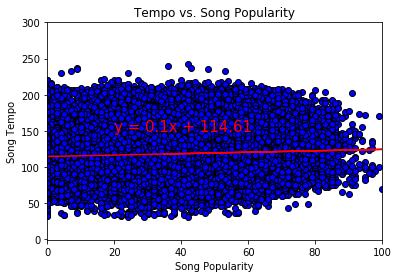

In [29]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter3=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter3=clean_df["tempo"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,300)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Tempo")
plt.title("Tempo vs. Song Popularity")
plt.scatter(x_axis_scatter3, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter3,y_axis_scatter3)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter3,regress_values,"r-")
plt.annotate(line_eq,(20,150),fontsize=15,color="red")
plt.savefig("Images/Scatterplot of Tempo vs Popul.png")

The correlation between popularity and tempo is 0.32


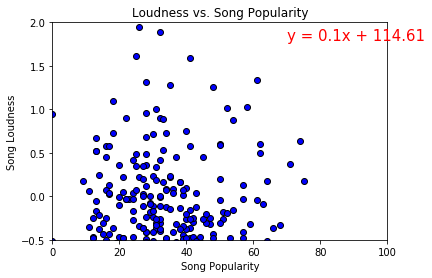

In [30]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter4=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter4=clean_df["loudness"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Loudness")
plt.title("Loudness vs. Song Popularity")
plt.scatter(x_axis_scatter4, y_axis_scatter4, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter4,y_axis_scatter4)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter4,regress_values,"r-")
plt.annotate(line_eq,(70,1.8),fontsize=15,color="red")
plt.savefig("Images/Scatterplot of Loud vs Popul.png")

The correlation between popularity and tempo is 0.05


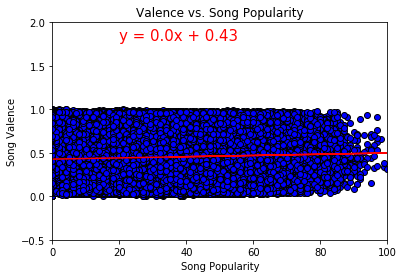

In [31]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter5=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter5=clean_df["valence"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Valence")
plt.title("Valence vs. Song Popularity")
plt.scatter(x_axis_scatter5, y_axis_scatter5, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter5,y_axis_scatter5)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter5, y_axis_scatter5)
regress_values = x_axis_scatter5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter5,regress_values,"r-")
plt.annotate(line_eq,(20,1.8),fontsize=15,color="red")
plt.savefig("Images/Scatterplot of Valence vs Popul.png")

In [85]:
# getting dataframe using qualitative side of the data
qualitative_df=spotify_df.filter(['genre','artist_name','key','mode','popularity','track_id'], axis=1)
qualitative_df

,genre,artist_name,key,mode,popularity,track_id
0,Movie,Henri Salvador,C#,Major,0,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,F#,Minor,1,0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,C,Minor,3,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,C#,Major,0,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,F,Major,4,0IuslXpMROHdEPvSl1fTQK
...,...,...,...,...,...,...
232720,Soul,Slave,D,Major,39,2XGLdVl7lGeq8ksM6Al7jT
232721,Soul,Jr Thomas & The Volcanos,E,Minor,38,1qWZdkBl4UVPj9lK6HuuFM
232722,Soul,Muddy Waters,D,Major,47,2ziWXUmQLrXTiYjCg2fZ2t
232723,Soul,R.LUM.R,A,Major,44,6EFsue2YbIG4Qkq8Zr9Rir


In [86]:
#Dropping duplicates in qualitative data
clean_qualitative=qualitative_df.drop_duplicates(subset=['track_id'])
clean_qualitative

,genre,artist_name,key,mode,popularity,track_id
0,Movie,Henri Salvador,C#,Major,0,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,F#,Minor,1,0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,C,Minor,3,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,C#,Major,0,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,F,Major,4,0IuslXpMROHdEPvSl1fTQK
...,...,...,...,...,...,...
232716,Soul,John Legend,A#,Minor,39,1U0OMWvR89Cm20vCNar50f
232717,Soul,Belly,D,Major,43,2gGqKJWfWbToha2YmDxnnj
232719,Soul,"Bobby ""Blue"" Bland",A#,Minor,32,2iZf3EUedz9MPqbAvXdpdA
232721,Soul,Jr Thomas & The Volcanos,E,Minor,38,1qWZdkBl4UVPj9lK6HuuFM


In [23]:
#Group by popularity on the actual data to sort out more
genres_mode=pd.DataFrame(clean_qualitative.groupby(['mode'])['track_id'].count())
#genres_mode=genres_mode.reset_index()
genres_mode

,track_id
mode,
Major,116619
Minor,60155


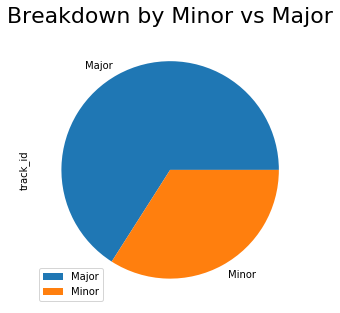

In [31]:
plot = genres_mode.plot.pie(y='track_id', figsize=(5, 5))

plt.title("Breakdown by Minor vs Major", y=1.02, fontsize=22);
plt.savefig("Images/Pie Chart of Minor vs Major.png")

In [34]:
#Group by mode and popularity
mode_popularity=pd.DataFrame(clean_qualitative.groupby(['mode'])['popularity'].mean())
mode_popularity=mode_popularity.reset_index()
mode_popularity=mode_popularity.sort_values('popularity')
mode_popularity

,mode,popularity
0,Major,35.322169
1,Minor,38.116798


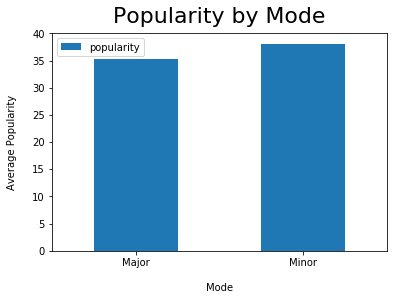

In [35]:
#Bar chart to display what key has heighest popularity
bar_mode = mode_popularity.plot.bar(x='mode', y='popularity', rot=0)
plt.xlabel("Mode", labelpad=15)
plt.ylabel("Average Popularity", labelpad=15)
plt.title("Popularity by Mode", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Popularity by Mode.png")

In [36]:
#Group by key and popularity
key_popularity=pd.DataFrame(clean_qualitative.groupby(['key'])['popularity'].mean())
key_popularity=key_popularity.reset_index()
key_popularity=key_popularity.sort_values('popularity')
key_popularity

,key,popularity
6,D#,33.344463
8,F,35.037103
5,D,35.218688
10,G,35.359982
1,A#,35.511406
3,C,35.600000
0,A,36.038688
7,E,36.270063
11,G#,37.758926
9,F#,38.129696


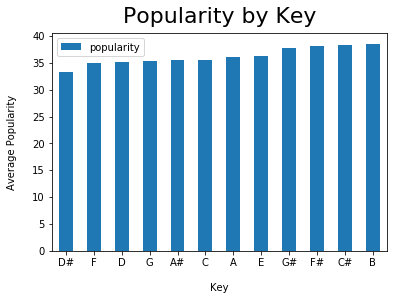

In [37]:
#Bar chart to display what key has heighest popularity
key_bar = key_popularity.plot.bar(x='key', y='popularity', rot=0)
plt.xlabel("Key", labelpad=15)
plt.ylabel("Average Popularity", labelpad=15)
plt.title("Popularity by Key", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Popularity by Key.png")

In [87]:
#Group by key and popularity
key_genre=pd.DataFrame(clean_qualitative.groupby(['key'])['track_id'].count())
key_genre=key_genre.reset_index()
key_genre=key_genre.sort_values('track_id')
key_genre

,key,track_id
6,D#,5960
11,G#,11175
9,F#,11365
1,A#,11924
2,B,12893
7,E,13408
8,F,15605
4,C#,16856
0,A,17499
5,D,18643


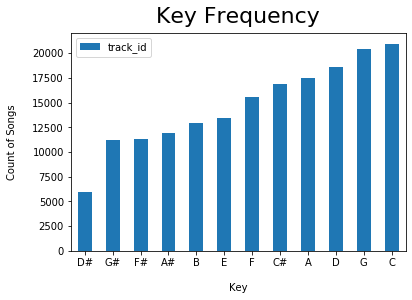

In [90]:
#Bar chart to display what key has heighest count in terms of genre
key_genre_bar = key_genre.plot.bar(x='key', y='track_id', rot=0)
plt.xlabel("Key", labelpad=15)
plt.ylabel("Count of Songs", labelpad=15)
plt.title("Key Frequency", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Frequency by Key.png")

In [47]:
happy_songs=spotify_df.loc[spotify_df["mode"]=="Major"]
happy_songs=happy_songs.drop(columns=['acousticness','duration_ms','instrumentalness','liveness','speechiness','time_signature'])
happy_songs

,genre,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.389,0.9100,C#,-1.828,Major,166.969,0.814
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.240,0.3260,C#,-12.178,Major,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.331,0.2250,F,-21.150,Major,140.576,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.578,0.0948,C#,-14.970,Major,87.479,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.703,0.2700,C#,-12.675,Major,82.873,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.802,0.5160,D,-9.014,Major,175.666,0.482
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.294,0.7390,C,-7.167,Major,176.402,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.687,0.7140,D,-10.626,Major,115.542,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.517,0.4190,D,-8.282,Major,84.135,0.813


In [48]:
#Analysis key C usually makes music innocently happy according to music theory
happy_keys=pd.DataFrame(happy_songs.groupby(['key'])['track_id'].count())
happy_keys=happy_keys.reset_index()
happy_keys=happy_keys.sort_values('track_id')
happy_keys

,key,track_id
6,D#,5108
1,A#,8084
9,F#,8097
2,B,8141
7,E,8666
11,G#,11329
8,F,11758
0,A,13876
4,C#,16246
5,D,18466


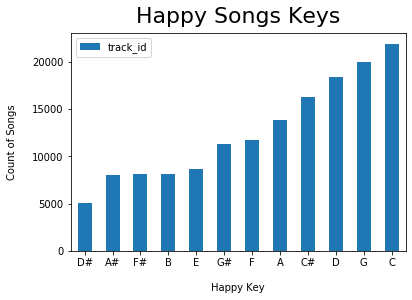

In [49]:
#Bar chart to display what key has heighest count 
happy_key_bar = happy_keys.plot.bar(x='key', y='track_id', rot=0)
plt.xlabel("Happy Key", labelpad=15)
plt.ylabel("Count of Songs", labelpad=15)
plt.title("Happy Songs Keys", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Happy Songs Keys.png")

In [74]:
#Analysis 
happy_keys1=pd.DataFrame(happy_songs.groupby(['key'])['popularity'].mean())
happy_keys1=happy_keys1.reset_index()
happy_keys1=happy_keys1.sort_values('popularity')
happy_keys1

,key,popularity
6,D#,35.795615
8,F,37.369536
1,A#,37.821128
10,G,39.571322
7,E,39.636511
3,C,39.969696
5,D,40.027943
0,A,40.098660
11,G#,42.042546
9,F#,42.155860


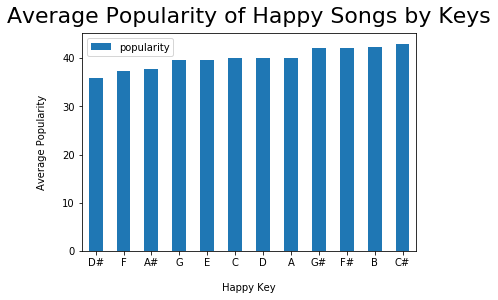

In [70]:
#Bar chart to display what sad key has heighest mean
happy_key_bar = happy_keys1.plot.bar(x='key', y='popularity', rot=0)
plt.xlabel("Happy Key", labelpad=15)
plt.ylabel("Average Popularity", labelpad=15)
plt.title("Average Popularity of Happy Songs by Keys", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Average Popularity by Keys.png")

In [50]:
sad_songs=spotify_df.loc[spotify_df["mode"]=="Minor"]
sad_songs=sad_songs.drop(columns=['acousticness','duration_ms','instrumentalness','liveness','speechiness','time_signature'])
sad_songs

,genre,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,tempo,valence
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.590,0.737,F#,-5.559,Minor,174.003,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.663,0.131,C,-13.879,Minor,99.488,0.3680
10,Movie,Leopold Stokowski,Symphony No.4 In E Minor Op.98 : IV. Allegro E...,0XKgegoxLcIihK3Klpfo3N,0,0.191,0.145,E,-17.239,Minor,85.225,0.0849
12,Movie,Idoles De La Musique,J'ai demandé à la lune,0jF6HUm18fg6QQCLHhfhC0,4,0.680,0.600,F#,-7.702,Minor,110.026,0.4330
25,Movie,Jean Piat,Comme minuit sonnait,16UTNMhXjeJa8IG9uBijxZ,0,0.711,0.218,A#,-22.212,Minor,125.521,0.5910
...,...,...,...,...,...,...,...,...,...,...,...,...
232712,Soul,Great Good Fine Ok,You're The One For Me,3UzHyDmqpBJR2J65h0702t,38,0.630,0.655,C,-6.708,Minor,102.009,0.3290
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.736,0.701,A#,-4.345,Minor,99.991,0.7700
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.423,0.337,A#,-13.092,Minor,80.023,0.4970
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.785,0.683,E,-6.944,Minor,113.830,0.9690


In [51]:
#Analysis key B usually makes music calm, has sadness feeling
sad_keys=pd.DataFrame(sad_songs.groupby(['key'])['track_id'].count())
sad_keys=sad_keys.reset_index()
sad_keys=sad_keys.sort_values('track_id')
sad_keys


,key,track_id
6,D#,2458
11,G#,3830
5,D,5611
3,C,5639
10,G,6361
4,C#,6955
9,F#,7125
1,A#,7442
8,F,8521
7,E,8724


In [78]:
#Analysis key B usually makes music calm, has sadness feeling
sad_keys1=pd.DataFrame(sad_songs.groupby(['key'])['popularity'].mean())
sad_keys1=sad_keys1.reset_index()
sad_keys1=sad_keys1.sort_values('popularity')
sad_keys1

,key,popularity
5,D,39.786847
10,G,41.030184
0,A,41.137237
7,E,41.805708
3,C,42.015428
6,D#,43.020342
1,A#,43.258264
8,F,43.581622
9,F#,44.175018
2,B,44.381092


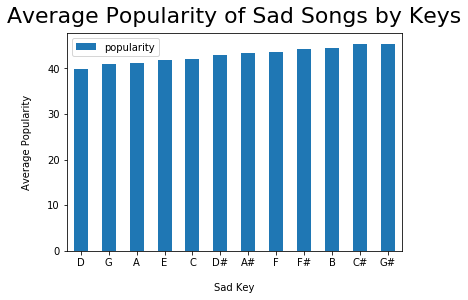

In [66]:
#Bar chart to display what sad key has heighest mean
sad_key_bar1 = sad_keys1.plot.bar(x='key', y='popularity', rot=0)
plt.xlabel("Sad Key", labelpad=15)
plt.ylabel("Average Popularity", labelpad=15)
plt.title("Average Popularity of Sad Songs by Keys", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Average Popularity by Keys.png")

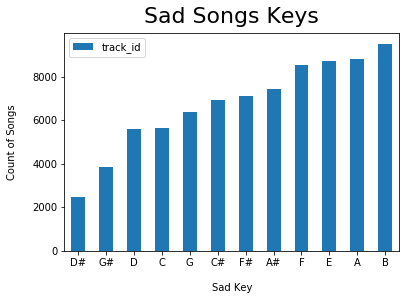

In [52]:
#Bar chart to display what sad key has heighest count 
sad_key_bar = sad_keys.plot.bar(x='key', y='track_id', rot=0)
plt.xlabel("Sad Key", labelpad=15)
plt.ylabel("Count of Songs", labelpad=15)
plt.title("Sad Songs Keys", y=1.02, fontsize=22);
plt.savefig("Images/Bar Chart of Sad Songs Keys.png")

In [79]:
valence_sadness=sad_songs['valence'].describe()
valence_sadness

count    80981.000000
mean         0.454307
std          0.258203
min          0.000000
25%          0.240000
50%          0.448000
75%          0.658000
max          1.000000
Name: valence, dtype: float64

In [80]:
valence_happiness=happy_songs['valence'].describe()
valence_happiness

count    151744.000000
mean          0.455243
std           0.261054
min           0.000000
25%           0.236000
50%           0.442000
75%           0.661000
max           1.000000
Name: valence, dtype: float64

In [63]:
tempo_sadness=sad_songs['tempo'].describe()
tempo_sadness

count    80981.000000
mean       117.169999
std         30.653720
min         31.033000
25%         92.720000
50%        115.031000
75%        138.007000
max        242.903000
Name: tempo, dtype: float64

In [65]:
tempo_happiness=happy_songs['tempo'].describe()
tempo_happiness

count    151744.000000
mean        117.931597
std          31.025810
min          30.379000
25%          92.997000
50%         115.992000
75%         139.701000
max         239.848000
Name: tempo, dtype: float64

In [66]:
energy_sadness=sad_songs['energy'].describe()
energy_sadness

count    80981.000000
mean         0.585853
std          0.256084
min          0.000020
25%          0.422000
50%          0.622000
75%          0.790000
max          0.999000
Name: energy, dtype: float64

In [67]:
energy_happiness=happy_songs['energy'].describe()
energy_happiness

count    151744.000000
mean          0.563009
std           0.266967
min           0.000098
25%           0.366000
50%           0.594000
75%           0.785000
max           0.999000
Name: energy, dtype: float64

In [68]:
loudness_sadness=sad_songs['loudness'].describe()
loudness_sadness

count    80981.000000
mean        -9.347299
std          5.973854
min        -47.669000
25%        -11.245000
50%         -7.518000
75%         -5.417000
max          1.610000
Name: loudness, dtype: float64

In [69]:
loudness_happiness=happy_songs['loudness'].describe()
loudness_happiness

count    151744.000000
mean         -9.688673
std           6.007804
min         -52.457000
25%         -12.025000
50%          -7.898000
75%          -5.557000
max           3.744000
Name: loudness, dtype: float64

In [70]:
dance_sadness=sad_songs['danceability'].describe()
dance_sadness

count    80981.000000
mean         0.570089
std          0.189605
min          0.059200
25%          0.453000
50%          0.595000
75%          0.713000
max          0.985000
Name: danceability, dtype: float64

In [71]:
dance_happiness=happy_songs['danceability'].describe()
dance_happiness

count    151744.000000
mean          0.545973
std           0.182888
min           0.056900
25%           0.427000
50%           0.559000
75%           0.679000
max           0.989000
Name: danceability, dtype: float64

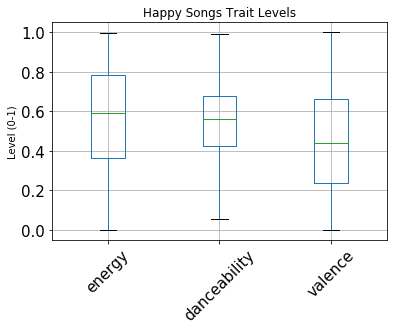

In [94]:
boxplot = happy_songs.boxplot(column=['energy','danceability','valence'],grid=True, rot=45, fontsize=15);
plt.ylabel('Level (0-1)');
plt.title('Happy Songs Trait Levels');
plt.savefig("Images/Box Plot of Happy Songs.png");

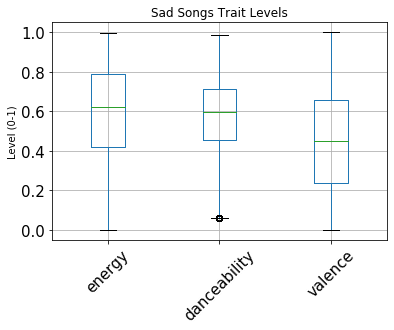

In [95]:
boxplot = sad_songs.boxplot(column=['energy','danceability','valence'],grid=True, rot=45, fontsize=15)
plt.ylabel('Level (0-1)');
plt.title('Sad Songs Trait Levels')
plt.savefig("Images/Box Plot of Sad Songs.png");

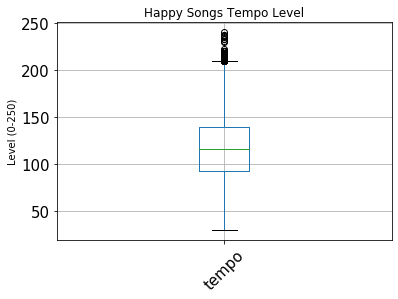

In [91]:
boxplot1 = happy_songs.boxplot(column=['tempo'],grid=True, rot=45, fontsize=15);
plt.ylabel('Level (0-250)');
plt.title('Happy Songs Tempo Level');
plt.savefig("Images/Box Plot of Happy Songs Tempo.png");

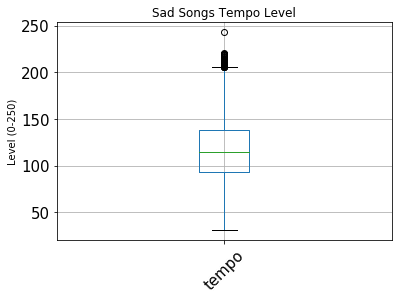

In [92]:
boxplot1 = sad_songs.boxplot(column=['tempo'],grid=True, rot=45, fontsize=15);
plt.ylabel('Level (0-250)');
plt.title('Sad Songs Tempo Level');
plt.savefig("Images/Box Plot of Sad Songs Tempo.png")